In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('df_sin_lugar.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46562 entries, 0 to 46561
Data columns (total 82 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Unnamed: 0      46562 non-null  int64
 1   VFIS_12M_2      46562 non-null  int64
 2   VFIS_12M_9      46562 non-null  int64
 3   PAREN_2         46562 non-null  int64
 4   PAREN_3         46562 non-null  int64
 5   PAREN_4         46562 non-null  int64
 6   PAREN_5         46562 non-null  int64
 7   PAREN_6         46562 non-null  int64
 8   PAREN_7         46562 non-null  int64
 9   PAREN_8         46562 non-null  int64
 10  PAREN_9         46562 non-null  int64
 11  PAREN_10        46562 non-null  int64
 12  PAREN_11        46562 non-null  int64
 13  P3_1_5          46562 non-null  int64
 14  P3_2_2.0        46562 non-null  int64
 15  P3_8_A2         46562 non-null  int64
 16  P3_8_B1         46562 non-null  int64
 17  P6_1_1_2        46562 non-null  int64
 18  P6_1_1_3        46562 non-

In [ ]:
df.isna().sum()

Unnamed: 0    0
VFIS_12M_2    0
VFIS_12M_9    0
PAREN_2       0
PAREN_3       0
             ..
P9_1_3_2      0
P9_1_8_2      0
P8_14_2.0     0
P8_14_8.0     0
P8_14_9.0     0
Length: 82, dtype: int64

In [ ]:
df = df.drop(['VFIS_12M_9','Unnamed: 0'], axis=1)
df.head()

,VFIS_12M_2,PAREN_2,PAREN_3,PAREN_4,PAREN_5,PAREN_6,PAREN_7,PAREN_8,PAREN_9,PAREN_10,...,P12_7_3,P11_1_1_2,P11_1_1_3,P11_1_1_4,P9_1_1_2,P9_1_3_2,P9_1_8_2,P8_14_2.0,P8_14_8.0,P8_14_9.0
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,1,1,0,0,0,0,0,0,0,0,...,1,0,0,1,1,1,1,1,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,0,0
3,1,1,0,0,0,0,0,0,0,0,...,1,0,0,1,1,1,1,1,0,0
4,1,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,0,1,0,0


# Metodo de filtrado

In [ ]:
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split

In [ ]:
X = df.drop(columns=['VFIS_12M_2'])
y = df['VFIS_12M_2']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=0)

In [ ]:
c = pd.crosstab(y_train, X_train['PAREN_2'])
c

PAREN_2,0,1
VFIS_12M_2,,
0,1027,3167
1,6334,22065


In [ ]:
chi2_contingency(c)

Chi2ContingencyResult(statistic=9.842787333982374, pvalue=0.0017049895068626958, dof=1, expected_freq=array([[  947.19829411,  3246.80170589],
       [ 6413.80170589, 21985.19829411]]))

In [ ]:
chi_ls = []
for feature in X_train.columns:
    c = pd.crosstab(y_train, feature)
    p_value = chi2_contingency(c)[1]
    chi_ls.append(p_value)

Text(0.5, 1.0, 'Feature importance based on chi-square test')

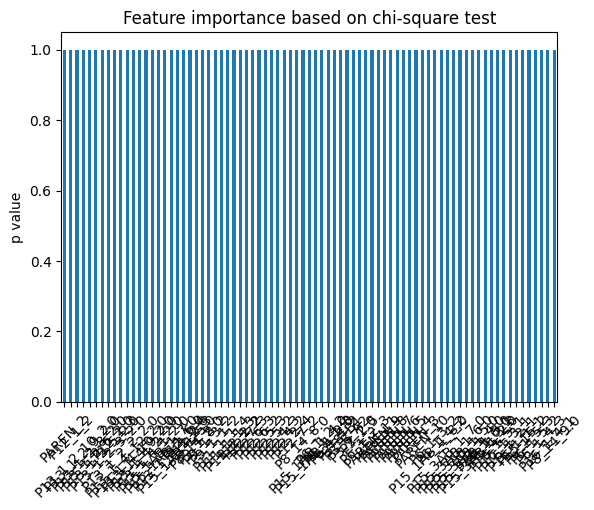

In [ ]:
pd.Series(chi_ls, index=X_train.columns).sort_values(ascending=True).plot.bar(rot=45)
plt.ylabel("p value")
plt.title("Feature importance based on chi-square test")

In [ ]:
selected = pd.Series(chi_ls, index=X_train.columns).sort_values(ascending=True)[0:10].index
selected

Index(['PAREN_2', 'P12_1_2', 'P13_1_2_10_2.0', 'P13_1_2_9_2.0',
       'P13_1_2_8_2.0', 'P13_1_2_6_2.0', 'P13_1_2_5_2.0', 'P13_1_2_3_2.0',
       'P12_1_3', 'P13_1_2_2_2.0'],
      dtype='object')

# Metodo de envoltura

In [ ]:
import seaborn as sns

<Axes: >

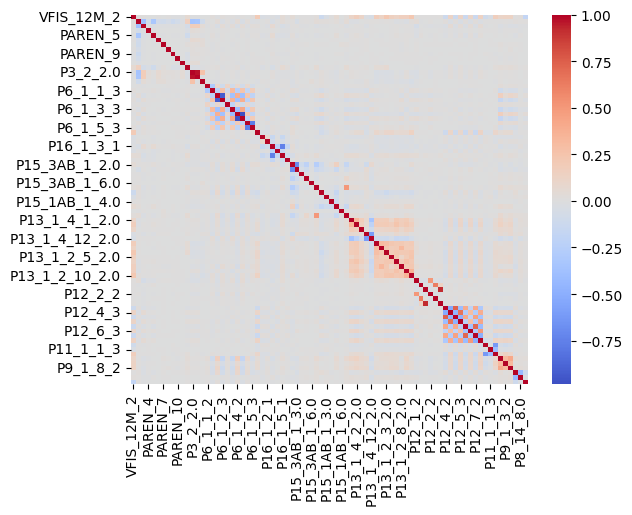

In [ ]:
correlation_matrix = df.corr(numeric_only=True)
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm", center=0)

In [ ]:
c = df.corr()['VFIS_12M_2'].abs()

#s = c.unstack()
so = c.sort_values(kind="quicksort")

In [ ]:
so

PAREN_11          0.000553
P15_3AB_1_3.0     0.000558
P16_1_6_1         0.000764
PAREN_5           0.001158
P12_2_3           0.001169
                    ...   
P8_14_9.0         0.182441
PE5_15_2          0.199923
P13_1_2_10_2.0    0.218002
P13_1_2_3_2.0     0.221872
VFIS_12M_2        1.000000
Name: VFIS_12M_2, Length: 80, dtype: float64

In [ ]:
so = pd.DataFrame(so)
rows = []

df_envoltura = pd.DataFrame()
df_envoltura['P13_1_2_3_2.0'] = X_train['P13_1_2_3_2.0']

In [ ]:
for row in so.index:
    rows.append(row)


In [ ]:
rows = rows[0:(len(rows)-1)]
rows

['PAREN_11',
 'P15_3AB_1_3.0',
 'P16_1_6_1',
 'PAREN_5',
 'P12_2_3',
 'PAREN_6',
 'P6_1_1_2',
 'P15_3AB_1_5.0',
 'P6_1_5_2',
 'P3_8_B1',
 'P15_1AB_1_6.0',
 'P12_2_2',
 'P8_14_2.0',
 'P15_3AB_1_6.0',
 'P15_3AB_1_4.0',
 'PAREN_7',
 'PAREN_8',
 'P6_1_3_2',
 'P12_1_4',
 'PAREN_4',
 'P12_1_3',
 'P15_1AB_1_4.0',
 'P12_2_4',
 'P6_1_3_3',
 'PAREN_3',
 'P3_8_A2',
 'P6_1_2_2',
 'P3_2_2.0',
 'PAREN_10',
 'P16_1_3_1',
 'P12_1_2',
 'PAREN_9',
 'P6_1_4_2',
 'P6_1_4_3',
 'PAREN_2',
 'P16_1_2_1',
 'P6_1_2_3',
 'P8_14_8.0',
 'P6_1_5_3',
 'P6_1_1_3',
 'P15_3AB_1_7.0',
 'P15_1AB_1_7.0',
 'P13_1_4_10_2.0',
 'P16_1_4_1',
 'P16_1_1_1',
 'P16_1_5_1',
 'P15_1AB_1_3.0',
 'P15_3AB_1_2.0',
 'P11_1_1_3',
 'P13_1_4_12_2.0',
 'P15_1AB_1_5.0',
 'P3_1_5',
 'P11_1_1_2',
 'P12_6_3',
 'P13_1_4_1_2.0',
 'P9_1_1_2',
 'P13_1_4_9_2.0',
 'P12_4_2',
 'P12_5_2',
 'P12_5_3',
 'P12_4_3',
 'P15_1AB_1_2.0',
 'P12_7_2',
 'P12_6_2',
 'P9_1_8_2',
 'P13_1_2_2_2.0',
 'P9_1_3_2',
 'P13_1_2_6_2.0',
 'P12_7_3',
 'P13_1_2_5_2.0',
 'P13_1_2

In [ ]:
from sklearn.linear_model import LinearRegression
temporal_df = df_envoltura

reg = LinearRegression().fit(df_envoltura, y_train)
score = reg.score(df_envoltura, y_train)

for row in rows:
  temporal_df[row] = X_train[row]
  regt = LinearRegression().fit(temporal_df, y_train)
  scoret = regt.score(temporal_df, y_train)
  if scoret > score+0.01:
    df_envoltura = temporal_df
    reg = LinearRegression().fit(df_envoltura, y_train)
    score = reg.score(df_envoltura, y_train)
  temporal_df = df_envoltura





In [ ]:
df_envoltura

,P13_1_2_3_2.0,PAREN_11,P15_3AB_1_3.0,P16_1_6_1,PAREN_5,P12_2_3,PAREN_6,P6_1_1_2,P15_3AB_1_5.0,P6_1_5_2,...,P12_7_3,P13_1_2_5_2.0,P13_1_2_8_2.0,P13_1_2_9_2.0,P13_1_4_2_2.0,P11_1_1_4,P13_1_2_1_2.0,P8_14_9.0,PE5_15_2,P13_1_2_10_2.0
25802,1,0,1,0,0,0,0,0,0,0,...,0,1,1,1,0,1,1,0,1,1
5473,1,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,0,1,1
32123,1,0,0,0,1,0,0,0,0,0,...,1,0,1,0,1,1,1,0,1,1
32572,1,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,0,1,1
29205,1,0,0,0,0,0,0,0,0,0,...,1,1,1,0,1,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21243,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,1,0,0,1
45891,1,0,0,0,0,0,0,0,0,0,...,1,1,0,1,1,1,0,0,1,1
42613,1,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,0,0,1,1
43567,1,0,0,0,0,0,0,0,0,1,...,1,1,1,1,1,1,1,0,0,1
